## Wine Quality Prediction

## 1. Importing the libraries

In [140]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

## 2. Reading the dataset

In [141]:
red=pd.read_csv('/content/winequality-red.csv')
print(red.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## 3. Data Preparation and Cleaning

In [142]:
print('Shape of general_data for red wine :',red.shape)
red.head()

Shape of general_data for red wine : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [143]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [144]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [145]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 4. Data Analysis and Filtering

In [146]:
feature_ = red.columns[:-1]
def get_percentile(feature, q_range):
  dist = red[feature].describe()[str(q_range) + '%']
  return round(dist,2)

## 5. Data Visualization

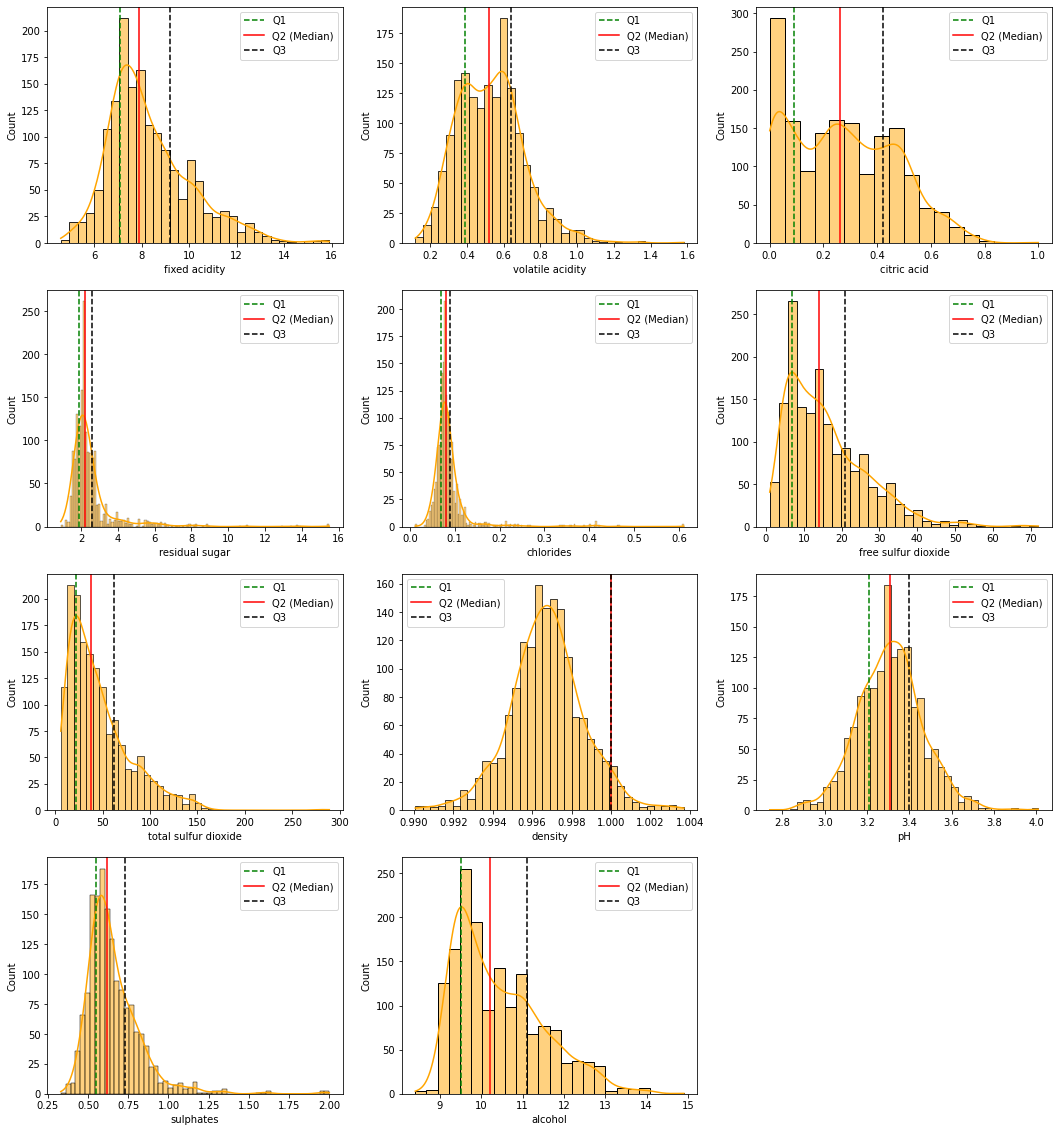

In [147]:
def render_counterplot():
    fig=plt.figure(figsize=(18, 20))
    for column, feature in enumerate(feature_):
        fig.add_subplot(4, 3, column + 1)
        
        q1 = get_percentile(feature, 25)
        q2 = get_percentile(feature, 50)
        q3 = get_percentile(feature, 75)
          
        sns.histplot(data=red, x=feature, kde=True, color = 'orange')
        
        plt.axvline(q1, linestyle='--', color='green', label='Q1')
        plt.axvline(q2, color='red', label='Q2 (Median)')
        plt.axvline(q3, linestyle='--',  color='black', label='Q3')
        plt.legend()
        
    plt.show()
    
render_counterplot()

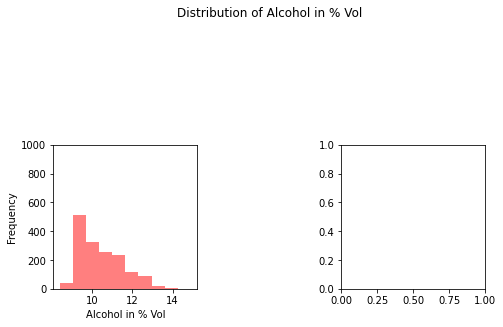

In [148]:
fig, ax = plt.subplots(1, 2)
 
ax[0].hist(red.alcohol, 10, facecolor ='red', alpha = 0.5, label ="Red wine")
 
 
fig.subplots_adjust(left = 0, right = 1, bottom = 0,
               top = 0.5, hspace = 0.05, wspace = 1)
 
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")

 
fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()

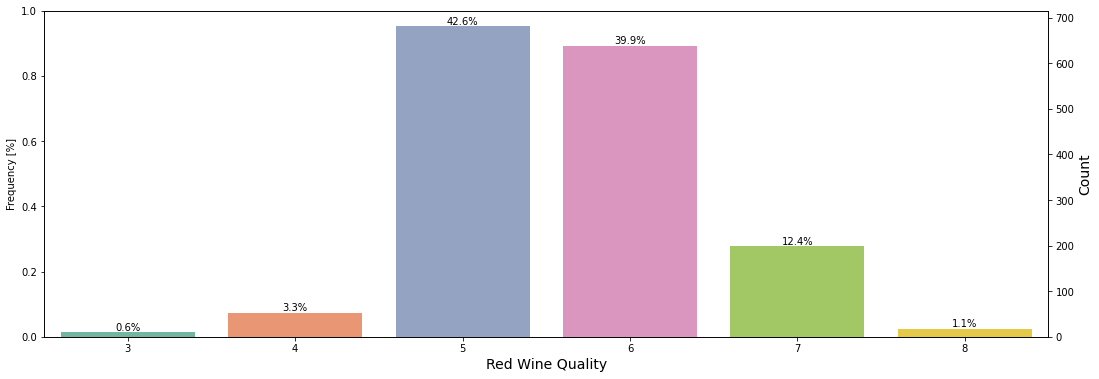

In [149]:
plt.figure(figsize = (18,6))
ax1 = sns.countplot(x='quality', data=red, palette='Set2') 
plt.xlabel('Red Wine Quality',fontsize  = 14)
plt.ylabel('Count',fontsize  = 14)
ax2=ax1.twinx()
ax2.yaxis.tick_left()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')
for p in ax1.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(red)), (x.mean(), y), ha='center', va='bottom')

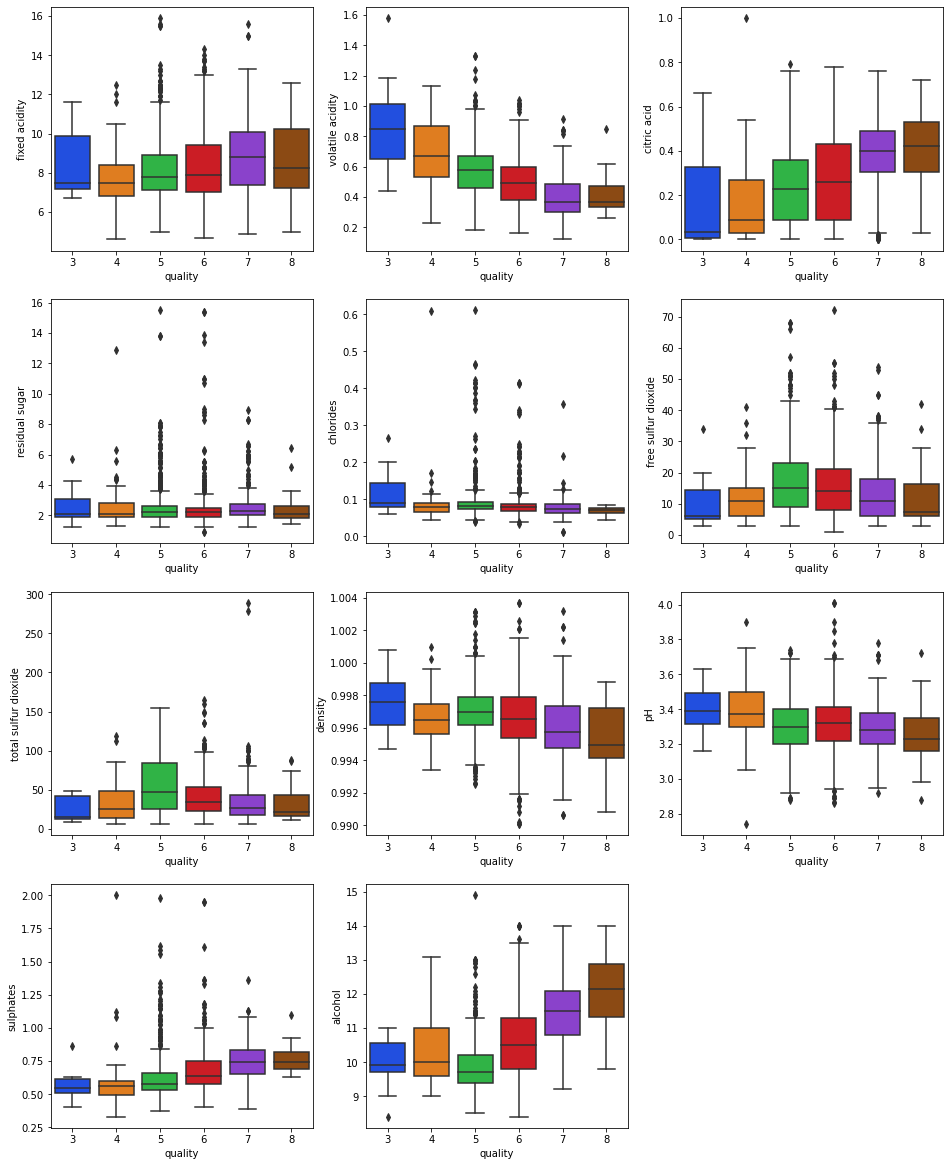

In [150]:
features_ = red.columns.values[:-1]

fig=plt.figure(figsize=(16, 26))
for column, feature in enumerate(features_):
    if feature != "quality":
        fig.add_subplot(5, 3, column + 1)
        sns.boxplot(data=red, x="quality", y=feature, color="#8585f2", palette="bright")
    
plt.show()

## 6. Feature Engineering

In [151]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1, max_depth=12)

In [152]:
x = red.drop(['quality'] , axis = 1)
rf.fit(x, red.quality)
features = red.columns    
importances = rf.feature_importances_    
sorted_index = np.argsort(importances)[:]

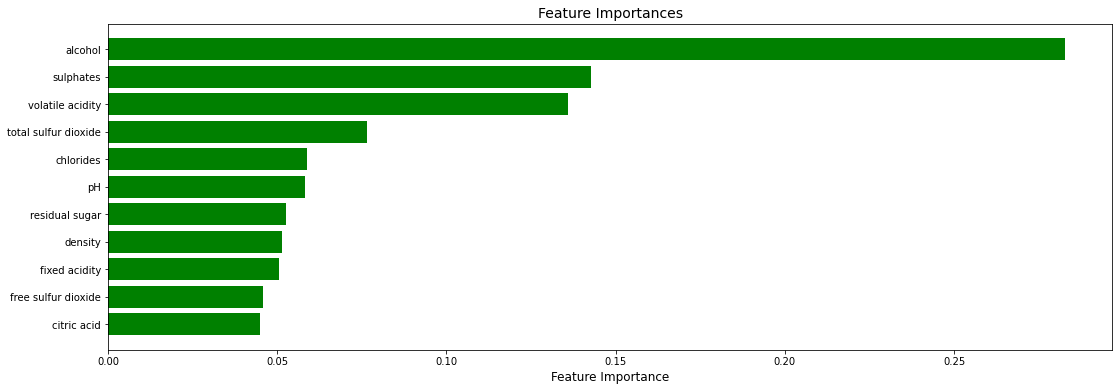

In [153]:
plt.figure(figsize=(18,6))
plt.title('Feature Importances', fontsize= 14)
plt.barh(range(len(sorted_index)), importances[sorted_index], color='green', align='center')
plt.yticks(range(len(sorted_index)), [features[i] for i in sorted_index]) # set x-axis ticks as feature names
plt.xlabel('Feature Importance', fontsize= 12)
plt.show()

In [154]:
red.drop(['free sulfur dioxide','citric acid'],axis=1,inplace=True)

In [155]:
X = red.drop('quality', axis = 1)
y = red['quality']

In [156]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify = y, random_state=42)

In [157]:
X

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,2.6,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,2.3,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,1.9,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,2.2,0.062,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,2.3,0.076,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,2.0,0.075,44.0,0.99547,3.57,0.71,10.2


## 7. Correlating and normalizing data

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])

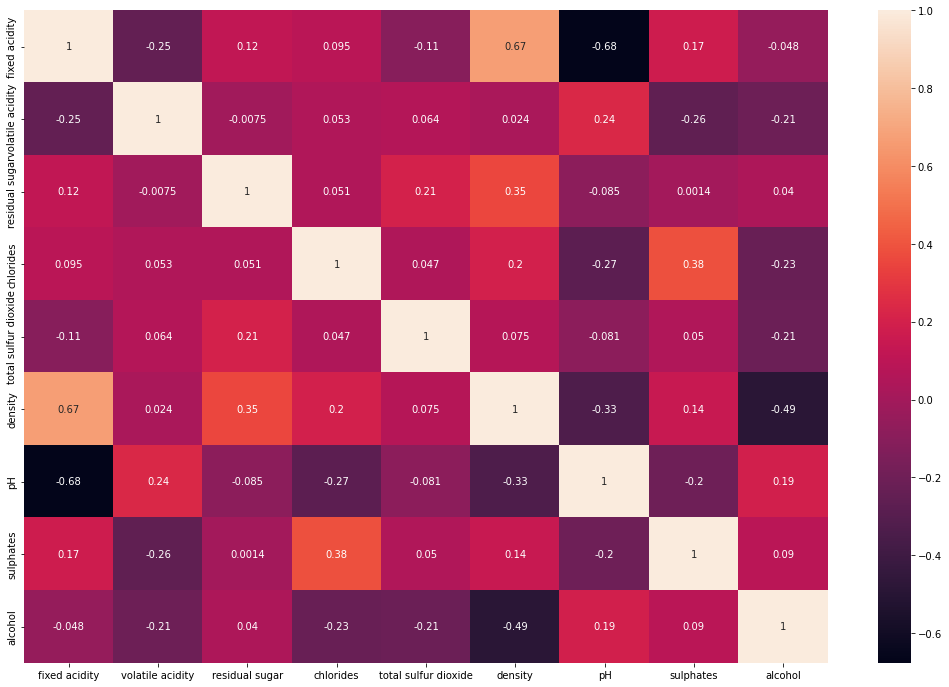

In [159]:
red_corr = X_train.copy()
plt.figure(figsize = (18,12))
sns.heatmap(red_corr.corr(),cbar=True, annot=True) 
plt.show()

In [160]:
X_train.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
1070,0.568736,-1.103037,-0.736729,-0.636853,-0.302258,-0.940708,-0.845406,1.314752,0.627630
563,-0.420879,-1.327359,0.100482,0.080037,0.391344,0.185132,0.005595,-0.298047,-0.308238
523,0.568736,-0.710475,-0.039053,-0.063341,2.864186,0.556871,-0.583560,-0.643646,-0.963346
1227,0.394099,0.298972,-0.387891,0.325828,-0.784763,0.498455,-0.256251,0.335553,-0.776172
1399,-0.653729,0.803695,-0.248356,-0.411544,-0.694293,-0.611453,0.725674,0.335553,0.627630


## 8. Applying SMOTE for overfitting

In [161]:
from imblearn.over_sampling import SMOTE
smte = SMOTE(random_state=42)
X_train_os, y_train_os = smte.fit_resample(X_train,y_train)
print('Training data classes :5\'s   6\'s   7\'s   4\'s  8\'s 3\'s')
print('Before over-sampling   {}   {}   {}   {}   {}   {}'.format(list(y_train.value_counts().values)[0],list(y_train.value_counts().values)[1],list(y_train.value_counts().values)[2],list(y_train.value_counts().values)[3],list(y_train.value_counts().values)[4],list(y_train.value_counts().values)[5]))
print('After over-sampling    {}   {}   {}   {}  {}  {}\n'.format(list(y_train_os.value_counts().values)[0],list(y_train_os.value_counts().values)[1],list(y_train_os.value_counts().values)[2],list(y_train_os.value_counts().values)[3],list(y_train_os.value_counts().values)[4],list(y_train_os.value_counts().values)[5]))

print('After Over-sampling {} synthetic records were added to the training data and now there are equal proportion of records from each class'.format(len(X_train_os)-len(X_train)))

Training data classes :5's   6's   7's   4's  8's 3's
Before over-sampling   613   574   179   48   16   9
After over-sampling    613   613   613   613  613  613

After Over-sampling 2239 synthetic records were added to the training data and now there are equal proportion of records from each class


In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_os = le.fit_transform(y_train_os)
y_test = le.transform(y_test)

In [163]:
y_train_os = pd.DataFrame(y_train_os.reshape(len(y_train_os),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))

In [164]:
import tensorflow as tf                     
y_train_os = tf.keras.utils.to_categorical(y_train_os, 6)
y_test = tf.keras.utils.to_categorical(y_test, 6)

In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from keras.layers import Dropout

## 9. Building ANN Model

In [166]:
model=Sequential()
model.add(tf.keras.layers.Input(shape = 9,))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(6,activation='softmax'))

In [167]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                320       
                                                                 
 dense_28 (Dense)            (None, 64)                2112      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 6)                 390       
                                                                 
Total params: 6,982
Trainable params: 6,982
Non-train

In [168]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics= ['accuracy'])

## 10. Iterating the model for more analysis

In [169]:
history=model.fit(X_train_os,y_train_os,batch_size=50,epochs=400, verbose=1)

Epoch 1/400
74/74 [==============================] - 1s 2ms/step - loss: 1.4821 - accuracy: 0.3603
Epoch 2/400
74/74 [==============================] - 0s 2ms/step - loss: 1.1648 - accuracy: 0.5136
Epoch 3/400
74/74 [==============================] - 0s 2ms/step - loss: 1.0573 - accuracy: 0.5642
Epoch 4/400
74/74 [==============================] - 0s 2ms/step - loss: 1.0112 - accuracy: 0.5832
Epoch 5/400
74/74 [==============================] - 0s 2ms/step - loss: 0.9368 - accuracy: 0.6213
Epoch 6/400
74/74 [==============================] - 0s 3ms/step - loss: 0.9119 - accuracy: 0.6172
Epoch 7/400
74/74 [==============================] - 0s 2ms/step - loss: 0.8628 - accuracy: 0.6476
Epoch 8/400
74/74 [==============================] - 0s 2ms/step - loss: 0.8361 - accuracy: 0.6626
Epoch 9/400
74/74 [==============================] - 0s 2ms/step - loss: 0.8125 - accuracy: 0.6775
Epoch 10/400
74/74 [==============================] - 0s 2ms/step - loss: 0.7889 - accuracy: 0.6914
Epoch 11/

In [170]:
print('Weights :',model.layers[0].get_weights()[0])
print('Bias    :',model.layers[0].get_weights()[1])

Weights : [[-2.73532778e-01 -2.77306944e-01  1.58429459e-01  2.96259582e-01
   1.52778476e-01  3.76411021e-01 -1.76263139e-01  7.78219521e-01
  -1.08852744e-01 -3.77611399e-01  6.30023360e-01 -1.29031865e-02
   4.11143571e-01  4.83312100e-01  5.20052969e-01 -2.39329282e-02
  -1.51397511e-01 -2.07569137e-01 -5.13704956e-01 -5.13965428e-01
  -5.09282947e-01  2.17152759e-01 -1.72372282e-01  7.48661906e-02
  -3.48187357e-01 -6.68488204e-01 -1.56302214e-01  1.83499217e-01
   3.14126551e-01 -9.66520131e-01  5.44595480e-01  5.59485517e-02]
 [-4.29970711e-01 -1.18528306e-01  4.67915028e-01 -5.19874930e-01
   3.27576816e-01  2.36725301e-01  4.41952705e-01  3.14335734e-01
  -1.04694851e-01  4.61789697e-01 -4.98302914e-02 -3.94075125e-01
  -2.82641023e-01  2.47393876e-01  9.17586312e-02 -6.69955671e-01
  -3.06664139e-01 -5.31333447e-01  1.15207583e-01  4.19263691e-01
  -3.37364942e-01 -5.59561737e-02  1.49543658e-01 -1.68681428e-01
   4.34447587e-01 -4.67264950e-02 -3.33799452e-01  3.91035616e-01

## 11. Final Prediction and result

In [171]:
y_pred = model.predict(X_test)

In [172]:
y_pred.shape

(160, 6)

In [173]:
print('Red Wine quality: ',model.predict([[2.34,4.25,2.34,0.23,0.64,1.25,0.24,1.023,2.014]])[0][3])

Red Wine quality:  0.999972


## 12. Final Metrics

Train: 0.955, Test: 0.694



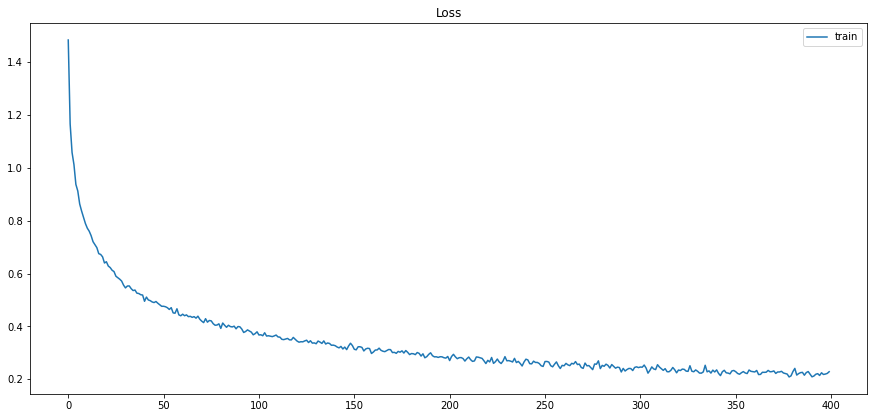

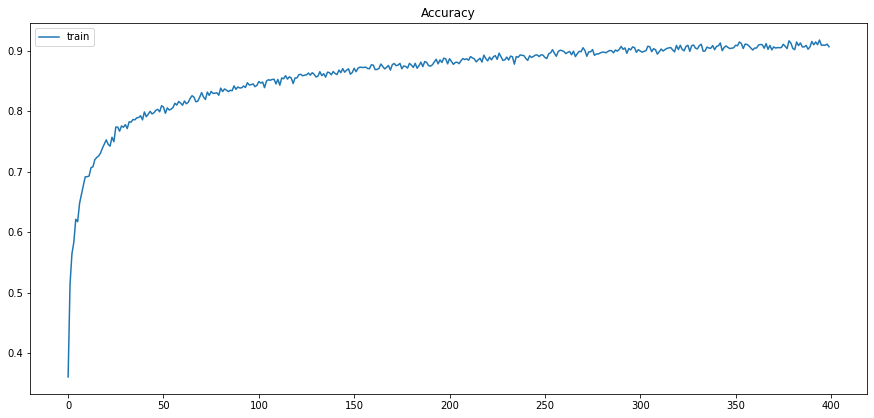

In [174]:
_, train_acc = model.evaluate(X_train_os, y_train_os, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
plt.figure(figsize=(15,15))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
print()
# plot accuracy during training
plt.figure(figsize=(15,15))
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()